<a href="https://colab.research.google.com/github/Abhiraj36/HumanEmotionsDetection/blob/main/Song_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.0 MB/s eta 0:00:00
25-05-19 15:49:19 - Directory /root/.deepface has been created
25-05-19 15:49:19 - Directory /root/.deepface/weights has been created


Saving sad_boy.jpeg to sad_boy.jpeg


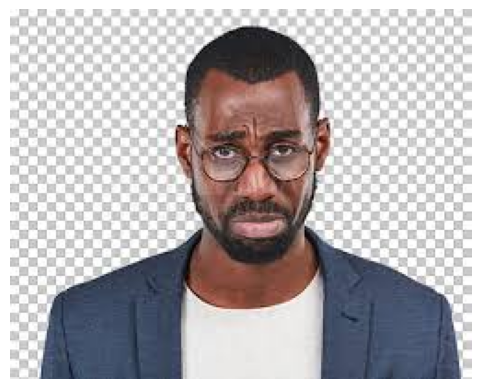

25-05-19 15:49:27 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 115MB/s]


Detected Emotion: neutral


In [1]:
!pip install deepface --quiet

from deepface import DeepFace
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Analyze
result = DeepFace.analyze(img_path=img_path, actions=['emotion'], enforce_detection=False)
dominant_emotion = result[0]['dominant_emotion']

print(f"Detected Emotion: {dominant_emotion}")


In [2]:
!pip install --upgrade pillow
!pip install facenet-pytorch

  Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1


In [5]:
import gradio as gr
from fer import FER
import cv2
import numpy as np
import random
import urllib.parse

emotion_songs = {
    'happy': ["Tum Se Hi - Jab We Met", "Udein - Rock On!!", "Gallan Goodiyan - Dil Dhadakne Do"],
    'sad': ["Channa Mereya - Ae Dil Hai Mushkil", "Tadap Tadap - Hum Dil De Chuke Sanam", "Agar Tum Saath Ho - Tamasha"],
    'angry': ["Zinda - Bhaag Milkha Bhaag", "Malang - Title Track", "Khalibali - Padmaavat"],
    'surprise': ["Uff - Yeh Jawaani Hai Deewani", "Shubhaarambh - Kai Po Che!", "Tune Maari Entriyaan - Gunday"],
    'neutral': ["Raabta - Agent Vinod", "Kya Mujhe Pyaar Hai - Woh Lamhe", "Jeene Laga Hoon - Ramaiya Vastavaiya"],
    'disgust': ["Let it go instrumental - Calm down pick", "Locha-E-Ulfat - 2 States"],
    'fear': ["Bhool Bhulaiyaa - Title Track", "Aayat - Bajirao Mastani"]
}

detector = FER(mtcnn=True)

def recommend_song(image):
    if image is None:
        return "Please upload or take a selfie first."
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    emotion, score = detector.top_emotion(img) or ('neutral', 0.0)
    songs = emotion_songs.get(emotion, emotion_songs['neutral'])
    song_choice = random.choice(songs)
    search_query = urllib.parse.quote_plus(f"{song_choice} Hindi song")
    yt_url = f"https://www.youtube.com/results?search_query={search_query}"
    return (
        f"### 🎭 Emotion Detected: **{emotion.capitalize()}** ({score*100:.1f}%)\n\n"
        f"### 🎵 Recommended Song:\n"
        f"[{song_choice} ▶️]({yt_url})\n\n"
        f"Click the song to open YouTube and enjoy!"
    )

with gr.Blocks() as demo:
    gr.Markdown("# 🎤 Emotion-Based Hindi Song Recommender\nUpload a selfie image below:")
    img_input = gr.Image(type="numpy", label="Upload or drag & drop an image")
    btn = gr.Button("🎧 Get Song Recommendation")
    output = gr.Markdown()

    btn.click(fn=recommend_song, inputs=img_input, outputs=output)

demo.launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://585052bdba15681378.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
